## Linear Regression

In [1]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
m=100
X = 2*np.random.rand(m,1)
y = 4 + 3 * X + np.random.randn(m, 1)


In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size =15)
plt.rc('axes', labelsize= 15)
plt.rc('legend', fontsize= 15)
plt.rc('xtick', labelsize= 15)
plt.rc('ytick', labelsize= 15)

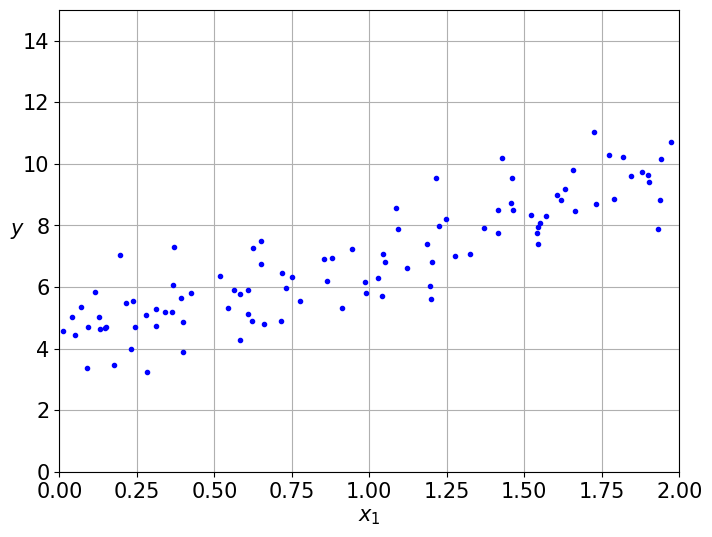

In [3]:
plt.figure(figsize=(8,6))
plt.plot(X,y ,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.show()

In [4]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)  
best_theta = np.linalg.inv(X_b.T@X_b)@X_b.T@y
print(best_theta)

[[4.21509616]
 [2.77011339]]


In [5]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict =X_new_b@best_theta

y_predict

array([[4.21509616],
       [9.75532293]])

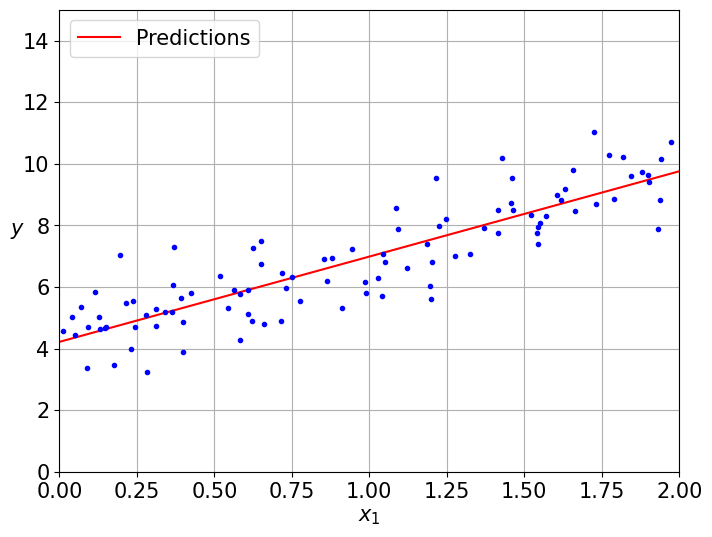

In [6]:
plt.figure(figsize=(8,6))
plt.plot(X_new, y_predict, 'r-', label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.legend(loc="upper left")

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_predict = lin_reg.predict(X_new)
lin_predict

array([[4.21509616],
       [9.75532293]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [9]:
residuals ## the lower the better

array([80.6584564])

In [10]:
rank ## number of independent features

np.int32(2)

## Gradient Descent


In [11]:
eta = 0.03  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [12]:
theta

array([[4.21507295],
       [2.77013388]])

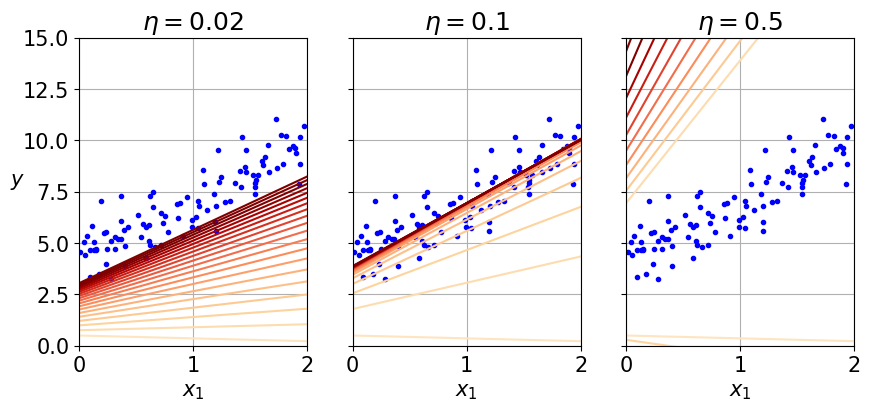

In [13]:
# extra code – generates and saves Figure 4–8

import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
plt.show()

finding best learning rate for SGD using GridSearchCV

In [14]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'eta0': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]}
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3)
grid_search = GridSearchCV(sgd_reg, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X, y.ravel())
grid_search.best_params_

{'eta0': 0.03}

## Stochastic Gradient Descent

In [15]:
theta_path_sg = []

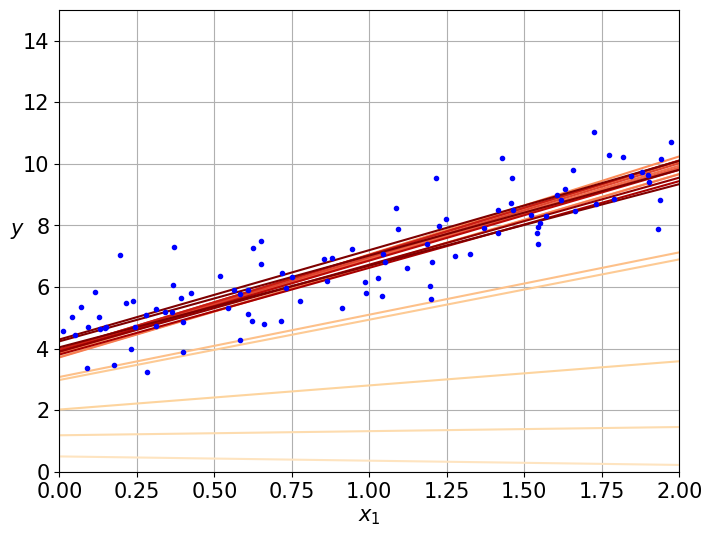

In [16]:
n_epochs= 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/ (t+t1)

np.random.seed(42)
theta = np.random.randn(2,1)

n_shown = 20
plt.figure(figsize=(8,6))

for epoch in range(n_epochs):
    for iteration in range(m):

        if epoch ==0 and iteration< n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
     
        random_index = np.random.randint(m)  
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients =  2* xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sg.append(theta) 

plt.plot(X,y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.show()          

In [17]:
theta

array([[4.21076011],
       [2.74856079]])

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=1e-5, learning_rate="constant", eta0=0.1, random_state=42) 
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.1215872]), array([2.68566488]))

## Mini Batch Gradient Descent

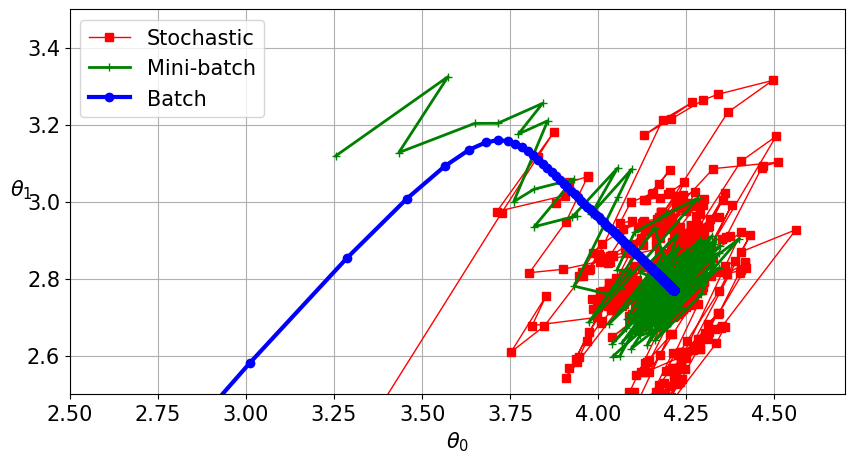

In [19]:
from math import ceil

n_epochs =50 
minibatch_size =20
n_batches_per_epoch = ceil(m / minibatch_size)
np.random.seed(42)
theta = np.random.randn(2,1)
t0, t1 = 200,1000

def learning_schedule(t):
    return t0 / (t+t1)

theta_path_mgd = []

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):

      idx = iteration * minibatch_size
      xi = X_b_shuffled[idx : idx + minibatch_size]
      yi = y_shuffled[idx : idx + minibatch_size]
      gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
      eta = learning_schedule(epoch * n_batches_per_epoch + iteration)
      theta = theta - eta * gradients
      theta_path_mgd.append(theta)
         
         
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sg = np.array(theta_path_sg)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(10,5))
plt.plot(theta_path_sg[:, 0], theta_path_sg[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$", rotation=0)
plt.axis([2.5, 4.7, 2.5, 3.5])
plt.grid()
plt.legend(loc="upper left")
plt.show()

## Polynomial Regression


In [20]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

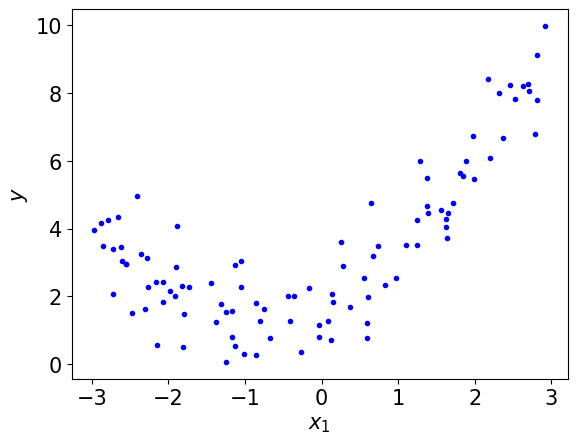

In [21]:
m= 100
X= 6*np.random.rand(m,1) - 3
y= 0.5*X**2 + X + 2 + rnd.randn(m,1) 

plt.plot(X,y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.show()

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias= False)
X_poly = poly_features.fit_transform(X)


In [25]:
X[0]

array([-0.75275929])

In [26]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

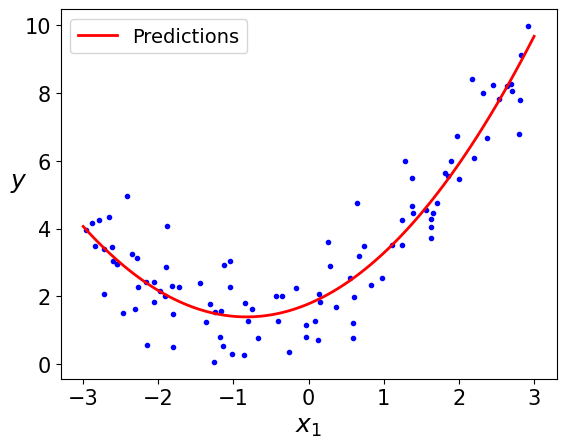

In [28]:
X_new = np.linspace(-3, 3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X,y,'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label= 'Predictions')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

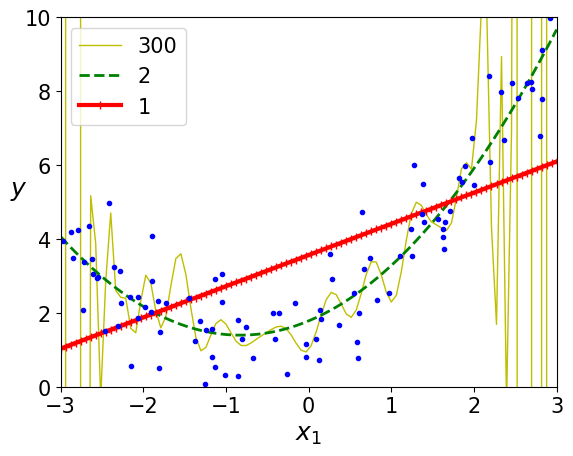

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
for style, width, degree in (('y-', 1, 300), ('g--',2, 2),("r-+", 3, 1)):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ('poly_features', poly_features),
        ('std_scaler', std_scaler),
        ('lin_reg', lin_reg)
      ])
    polynomial_regression.fit(X, y)
    y_new_big = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_new_big, style, label=str(degree), linewidth= width)


    
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()